In [108]:
import pandas as pd
import numpy as np

In [109]:
df = pd.read_csv('pima-indians.csv')

In [110]:
df

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [111]:
Target = df['Class variable (0 or 1)']
Inputs = df.drop('Class variable (0 or 1)',axis='columns')

In [112]:
Inputs

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [113]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts = train_test_split(Inputs,Target,test_size=0.1,random_state=0)

In [114]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_tr,y_tr)

GaussianNB()

In [115]:
y_pred = model.predict(x_ts)

In [116]:
y_prob = model.predict_proba(x_ts)

In [117]:
y_pred[0:4]

array([1, 0, 0, 1], dtype=int64)

In [118]:
y_prob[0:4]

array([[0.00310218, 0.99689782],
       [0.9472191 , 0.0527809 ],
       [0.96592705, 0.03407295],
       [0.30833905, 0.69166095]])

In [119]:
model.score(x_ts,y_ts)

0.8051948051948052

In [120]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [121]:
cm = confusion_matrix(y_pred,y_ts)
cm

array([[43,  7],
       [ 8, 19]], dtype=int64)

<Axes: >

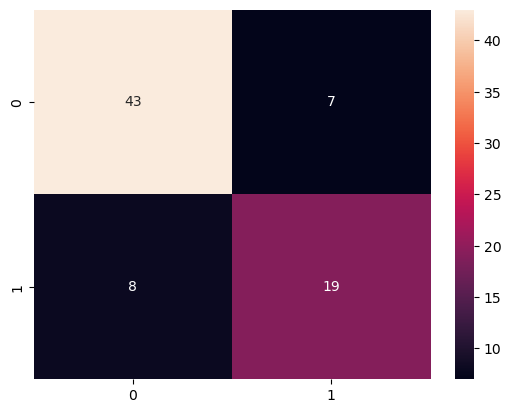

In [122]:
sns.heatmap(cm,annot=True)